In [1]:
# import pandas as pd
# import music_recommend

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# #emotion = { "joy":0.2, "excitement":0.5, "gratitude":0.7 }
# emotion = { "neutral":0.7 }
# music_recommend.get_music(emotion, None, None, True)

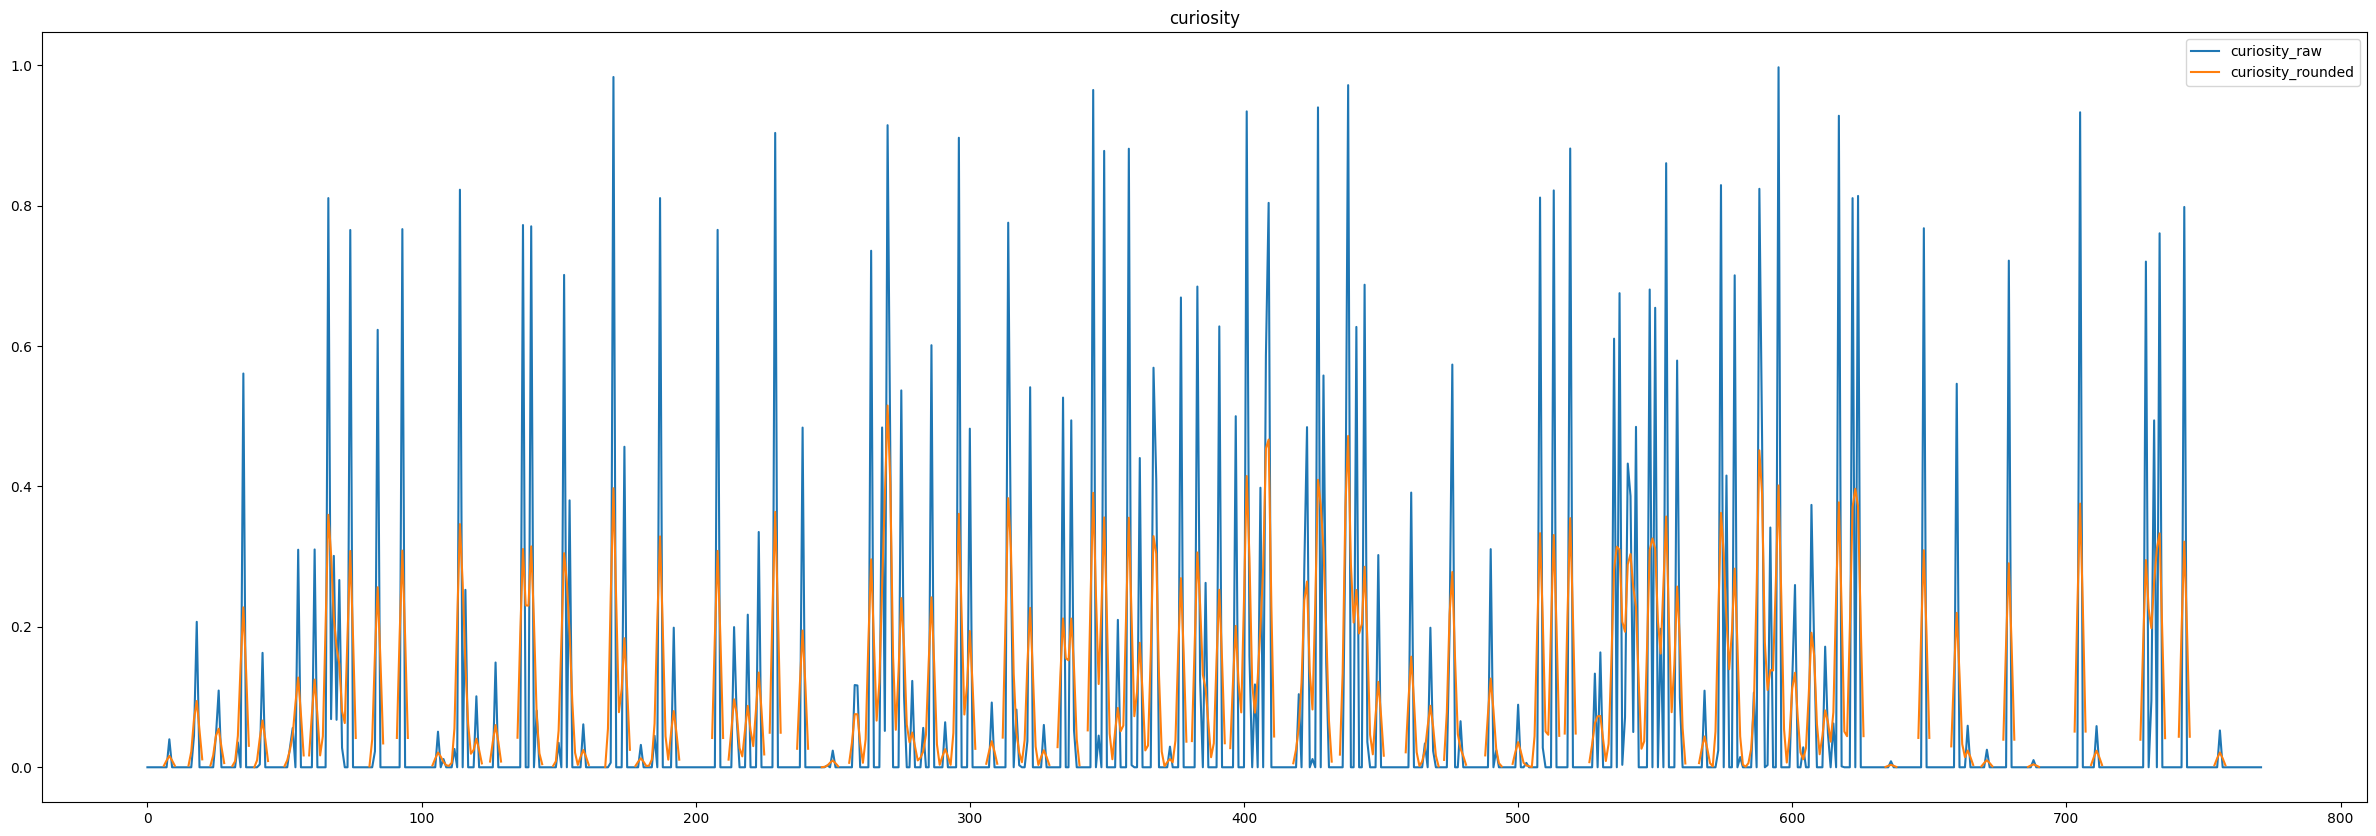

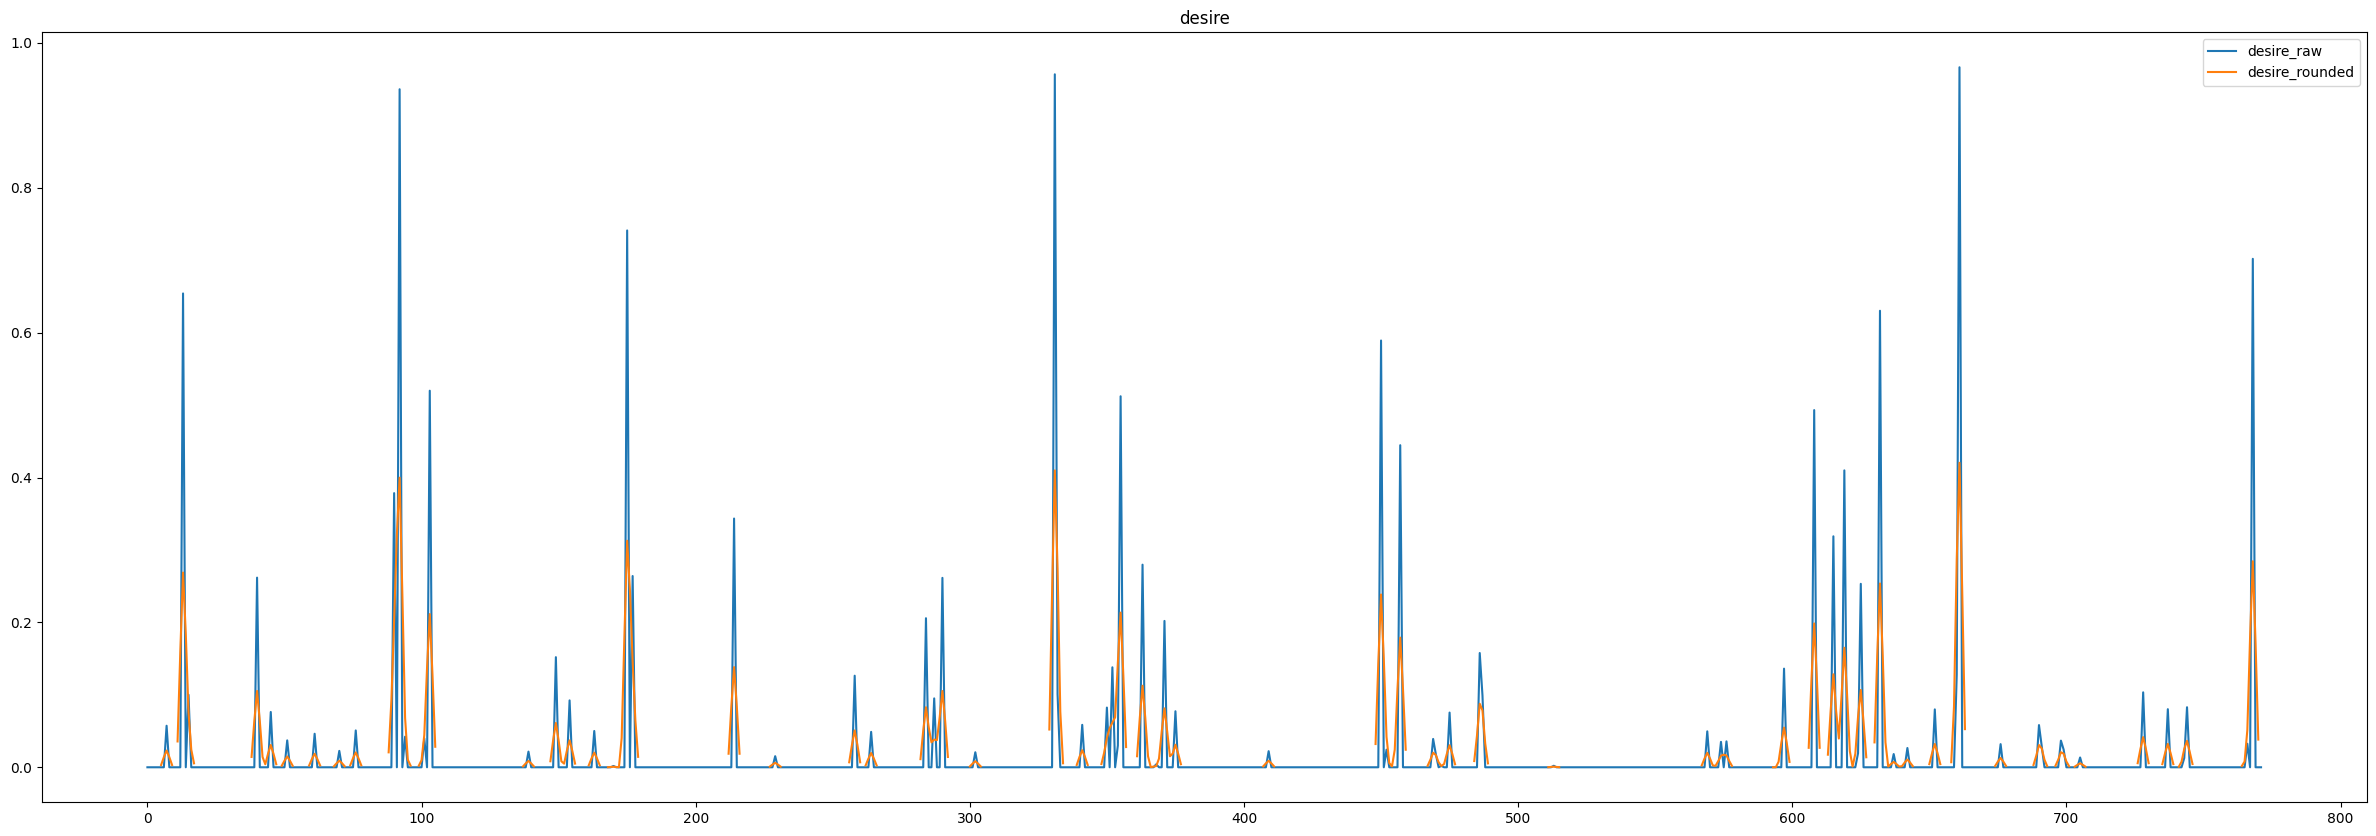

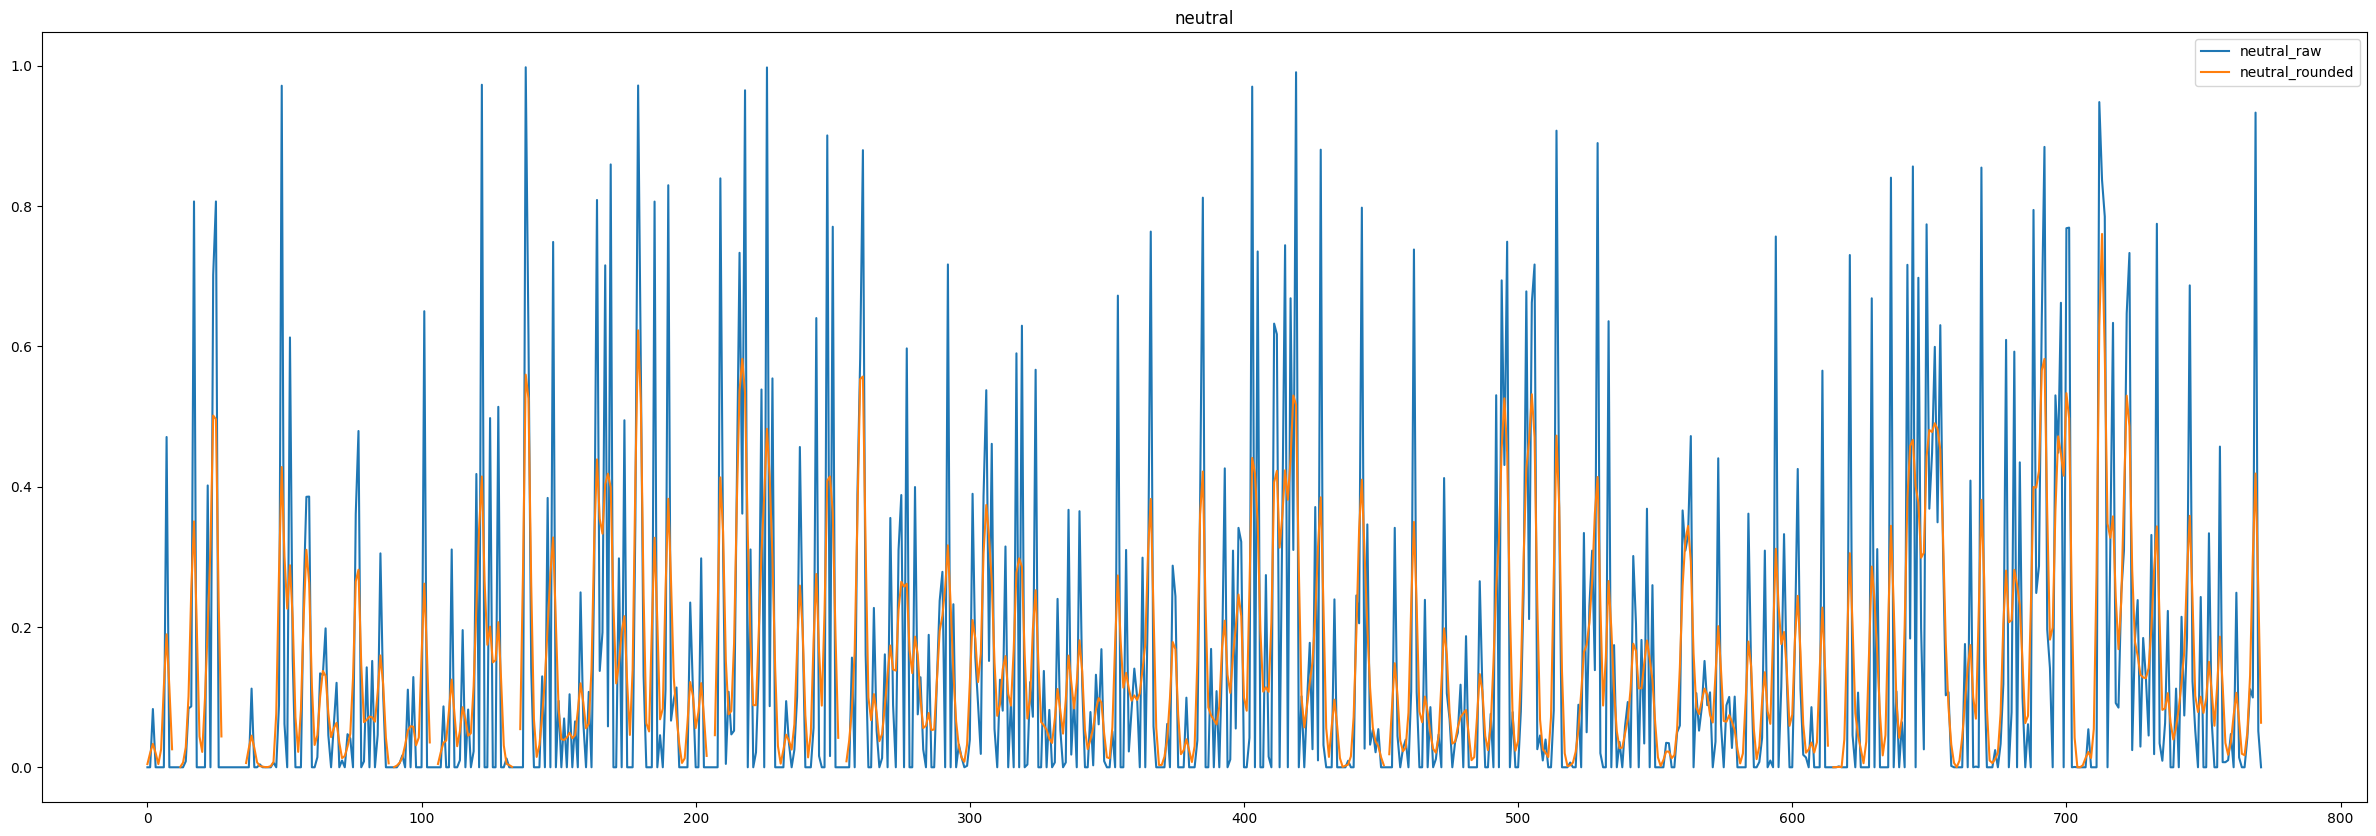

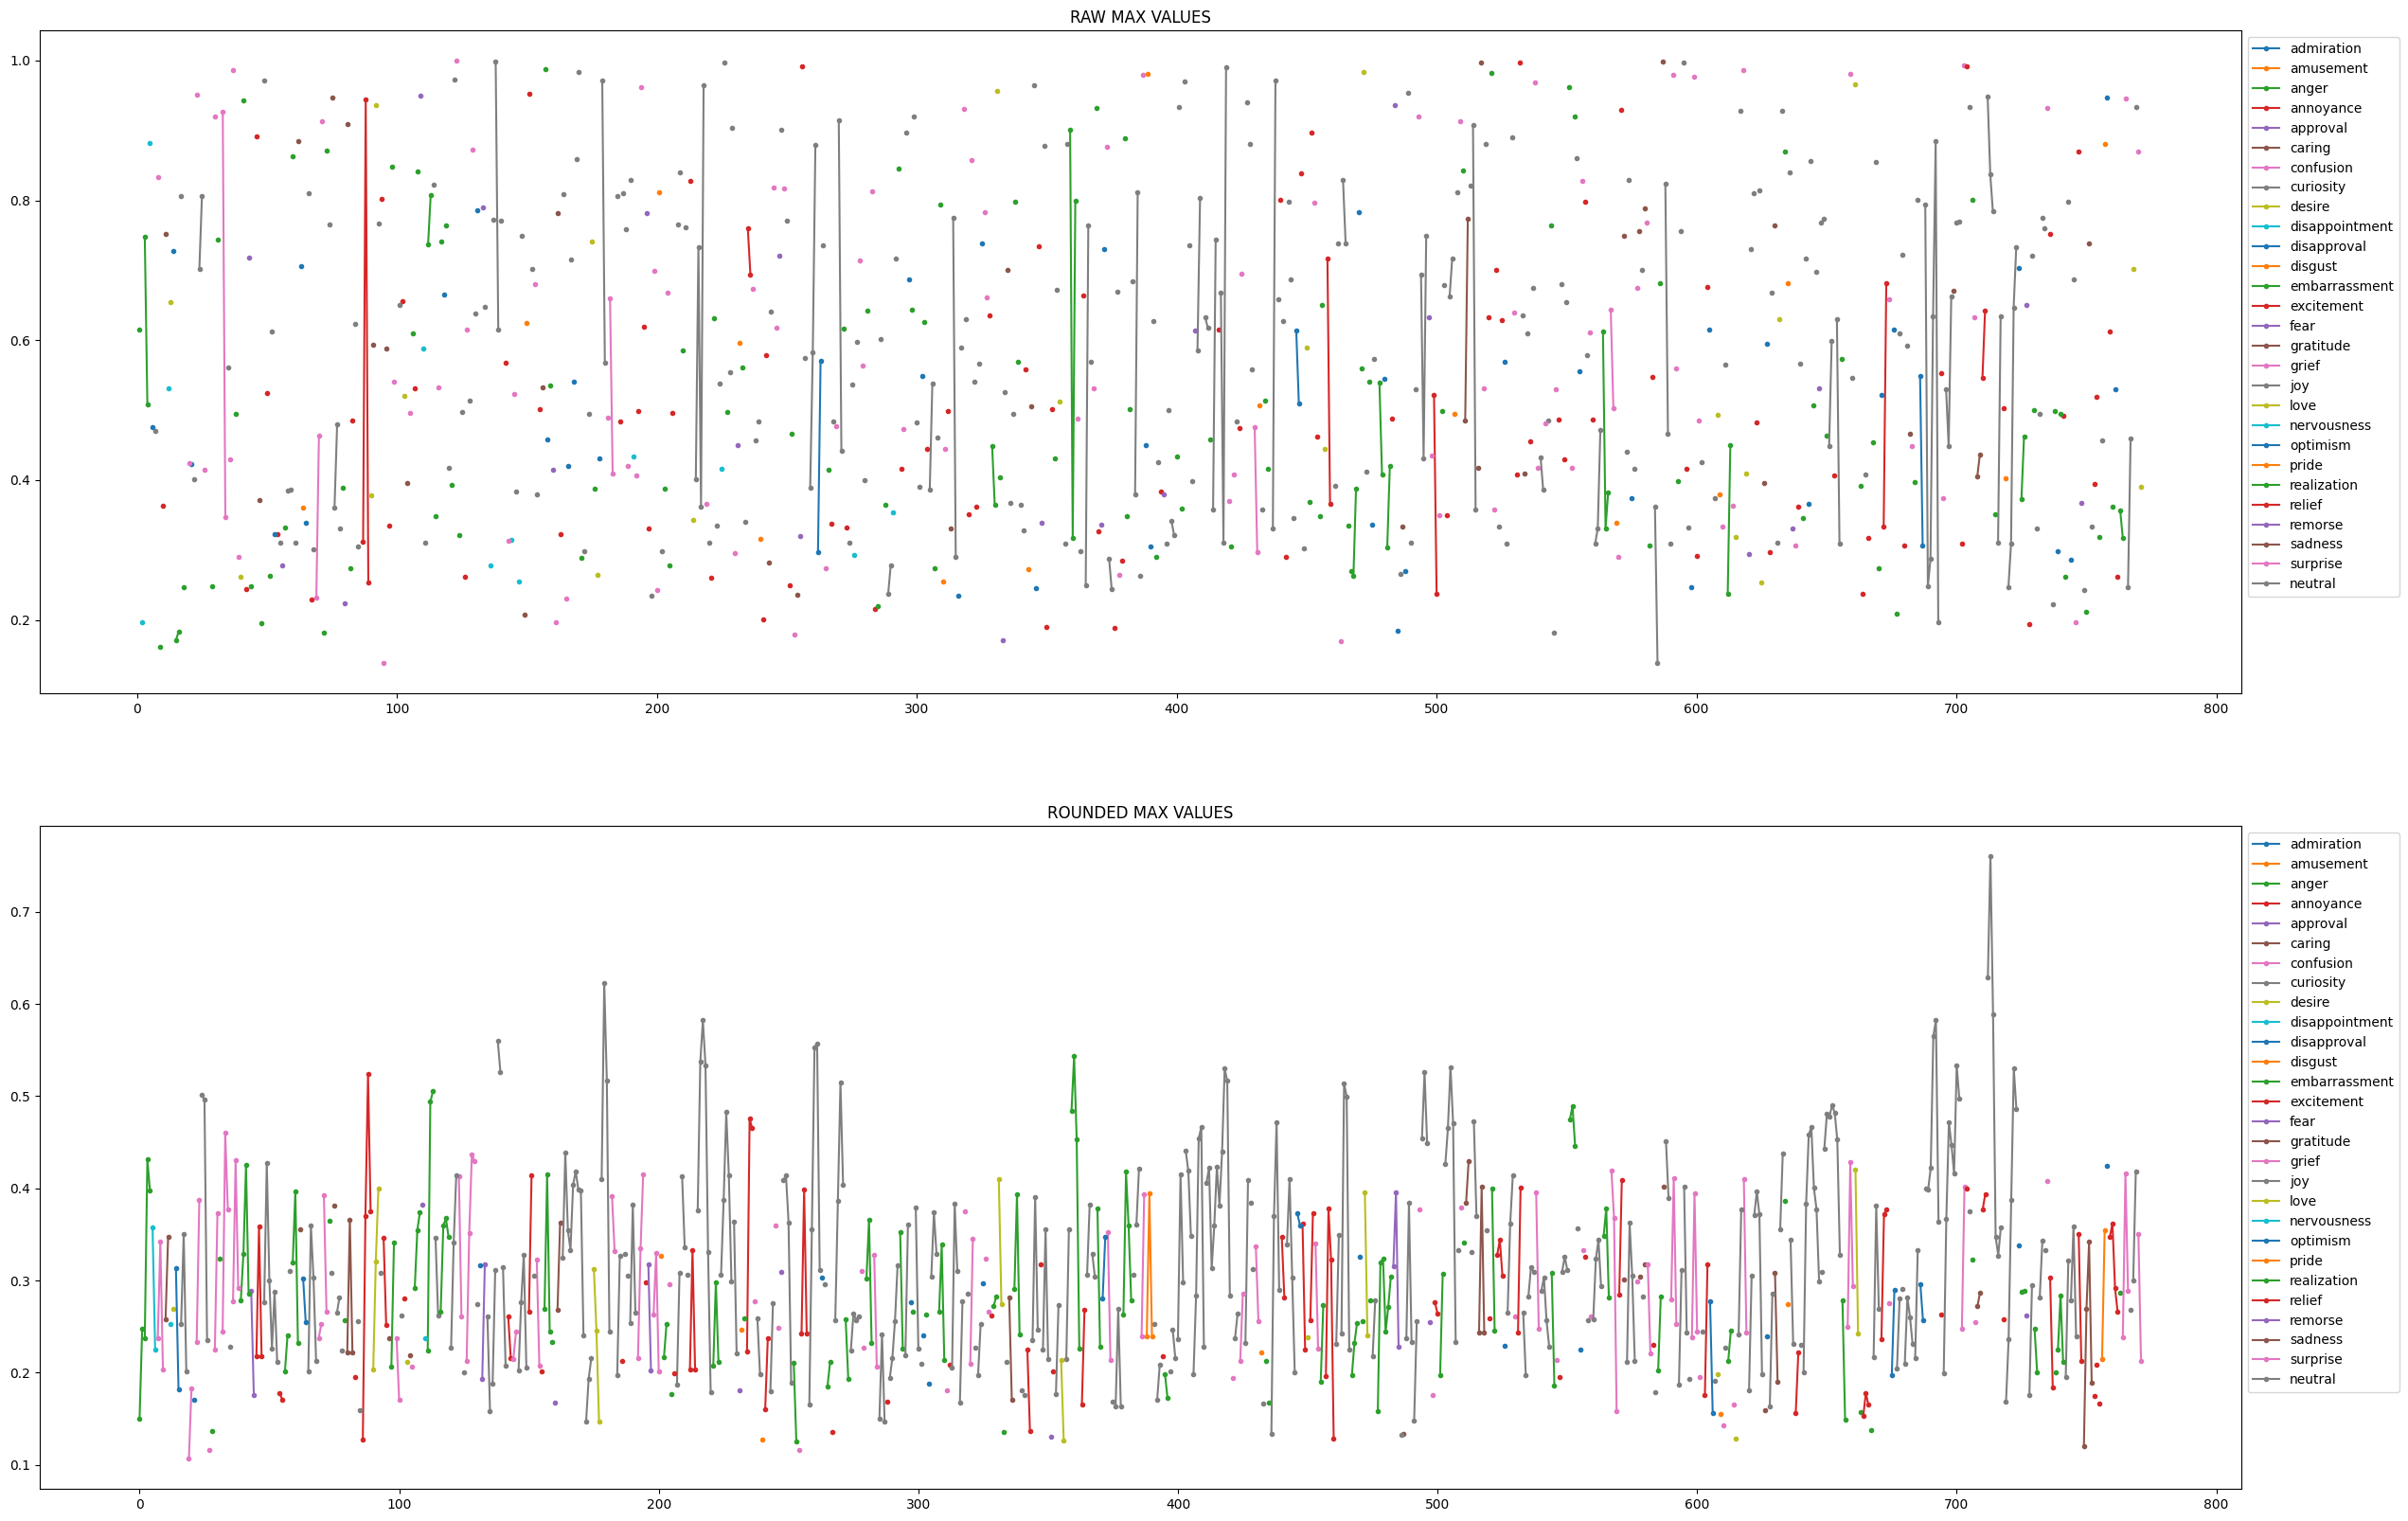

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import music_recommend
import json
from book_analysis import EMOTION, get_raw_values, get_rounded_values, data_to_json, transpose

file = 'raw/1.json'
raw, raw_max, cfi, length = get_raw_values(file)
rounded, rounded_max = get_rounded_values(raw)
emotions = transpose(rounded)

music = music_recommend.get_musics(emotions, length)
result = data_to_json(cfi, emotions, None, None, music)

with open('result/1.json', 'w+', encoding='utf-8') as f:
    f.write(json.dumps({'data':result}, ensure_ascii=False))

for e in ['curiosity', 'desire', 'neutral']:
    plt.figure(figsize=(30,10))
    plt.title(e)
    plt.plot(raw[e], '-', label = e + '_raw')
    l = [x if x != 0 else np.nan for x in rounded[e]]
    plt.plot(l, '-', label = e + '_rounded')
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

plt.figure(figsize=(30,20))
plt.subplot(2, 1, 1)
plt.title('RAW MAX VALUES')
for E in EMOTION:
    ##l = [e.get[EMO] for e in emotions]
    l = [val if E == raw_max[idx] else np.nan for idx, val in enumerate(raw[E])]
    #l = raw[E]
    plt.plot(l, '.-', label = E)
plt.legend(bbox_to_anchor=(1,1))

plt.subplot(2, 1, 2)
plt.title('ROUNDED MAX VALUES')
for E in EMOTION:
    l = [val if E == rounded_max[idx] else np.nan for idx, val in enumerate(rounded[E])]
    #l = rounded[E]
    plt.plot(l, '.-', label = E)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

['75', '75', '', '', '28', '28', '28', '28', '10', '10', '28', '28', '28', '28', '28', '28', '45', '45', '45', '1', '75', '23', '28', '28', '28', '28', '28', '10', '', '1', '82', '75', '10', '10', '10', '10', '10', '10', '10', '28', '28', '28', '28', '28', '28', '10', '10', '28', '75', '75', '75', '75', '75', '75', '75', '75', '', '28', '28', '28', '28', '28', '23', '23', '23', '75', '', '10', '84', '15', '', '10', '10', '', '28', '', '', '28', '28', '78', '75', '', '', '', '75', '75', '75', '75', '75', '75', '28', '28', '28', '28', '28', '28', '28', '23', '23', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '28', '23', '23', '23', '', '10', '10', '', '23', '23', '45', '45', '45', '45', '45', '28', '28', '10', '10', '10', '10', '10', '28', '28', '28', '10', '75', '75', '75', '75', '75', '75', '75', '', '45', '45', '45', '45', '45', '75', '75', '75', '75', '95', '28', '28', '28', '23', '23', '23', '28', '28', '46', '75', '75', '75', '75', '75', '75', '75', '75', '75',

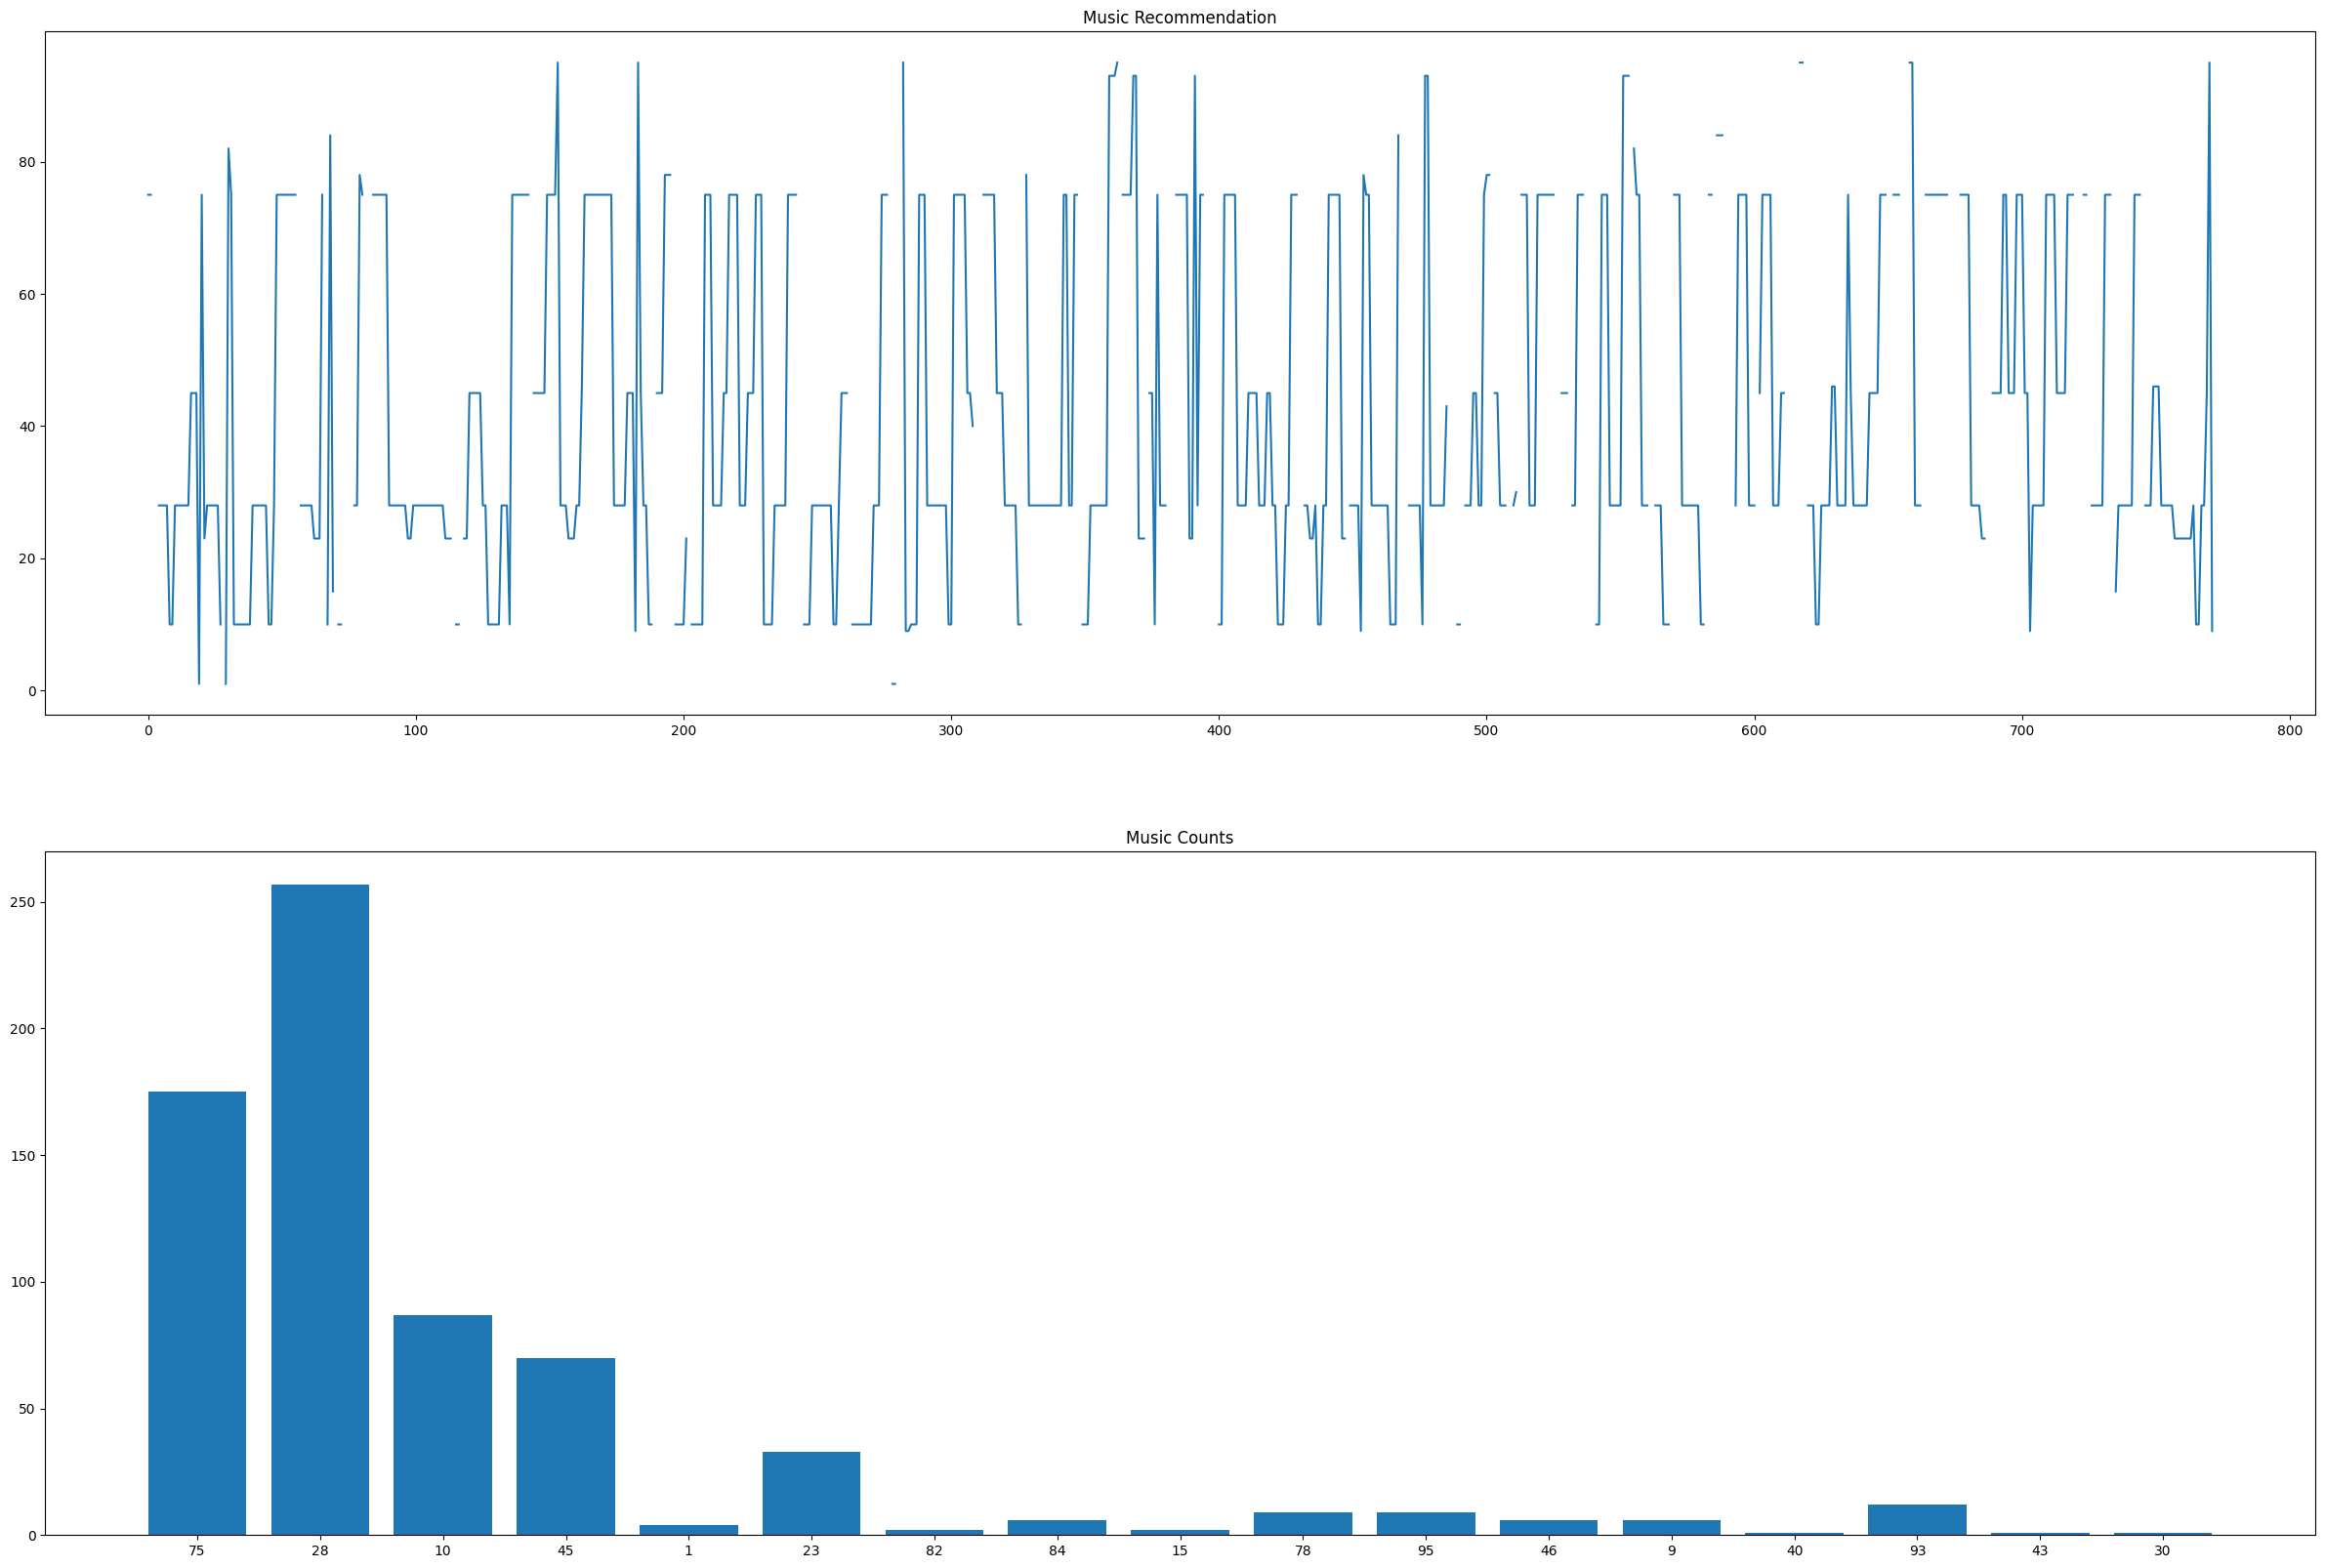

In [5]:
import json
import os
import numpy as np
import time
import matplotlib.pyplot as plt
import music_recommend

with open('result/1.json', 'r', encoding='utf-8') as p:
    jsn = json.load(p)
    music = [i['music'] for i in jsn['data']]

print(music)
print(music.count(''))

music_count = dict()
for i, m in enumerate(music):
    # if m == '':
    #     music[i] = np.nan
    # else:
    music_count[m] = music_count.get(m, 0) + 1    

music_count.pop('')

music = [np.nan if m == '' else int(m) for m in music]

plt.figure(figsize=(30,20))
plt.subplot(2, 1, 1)
plt.title('Music Recommendation')
plt.plot(music, '-')

plt.subplot(2, 1, 2)
plt.title('Music Counts')
plt.bar(music_count.keys(), music_count.values())
plt.show()

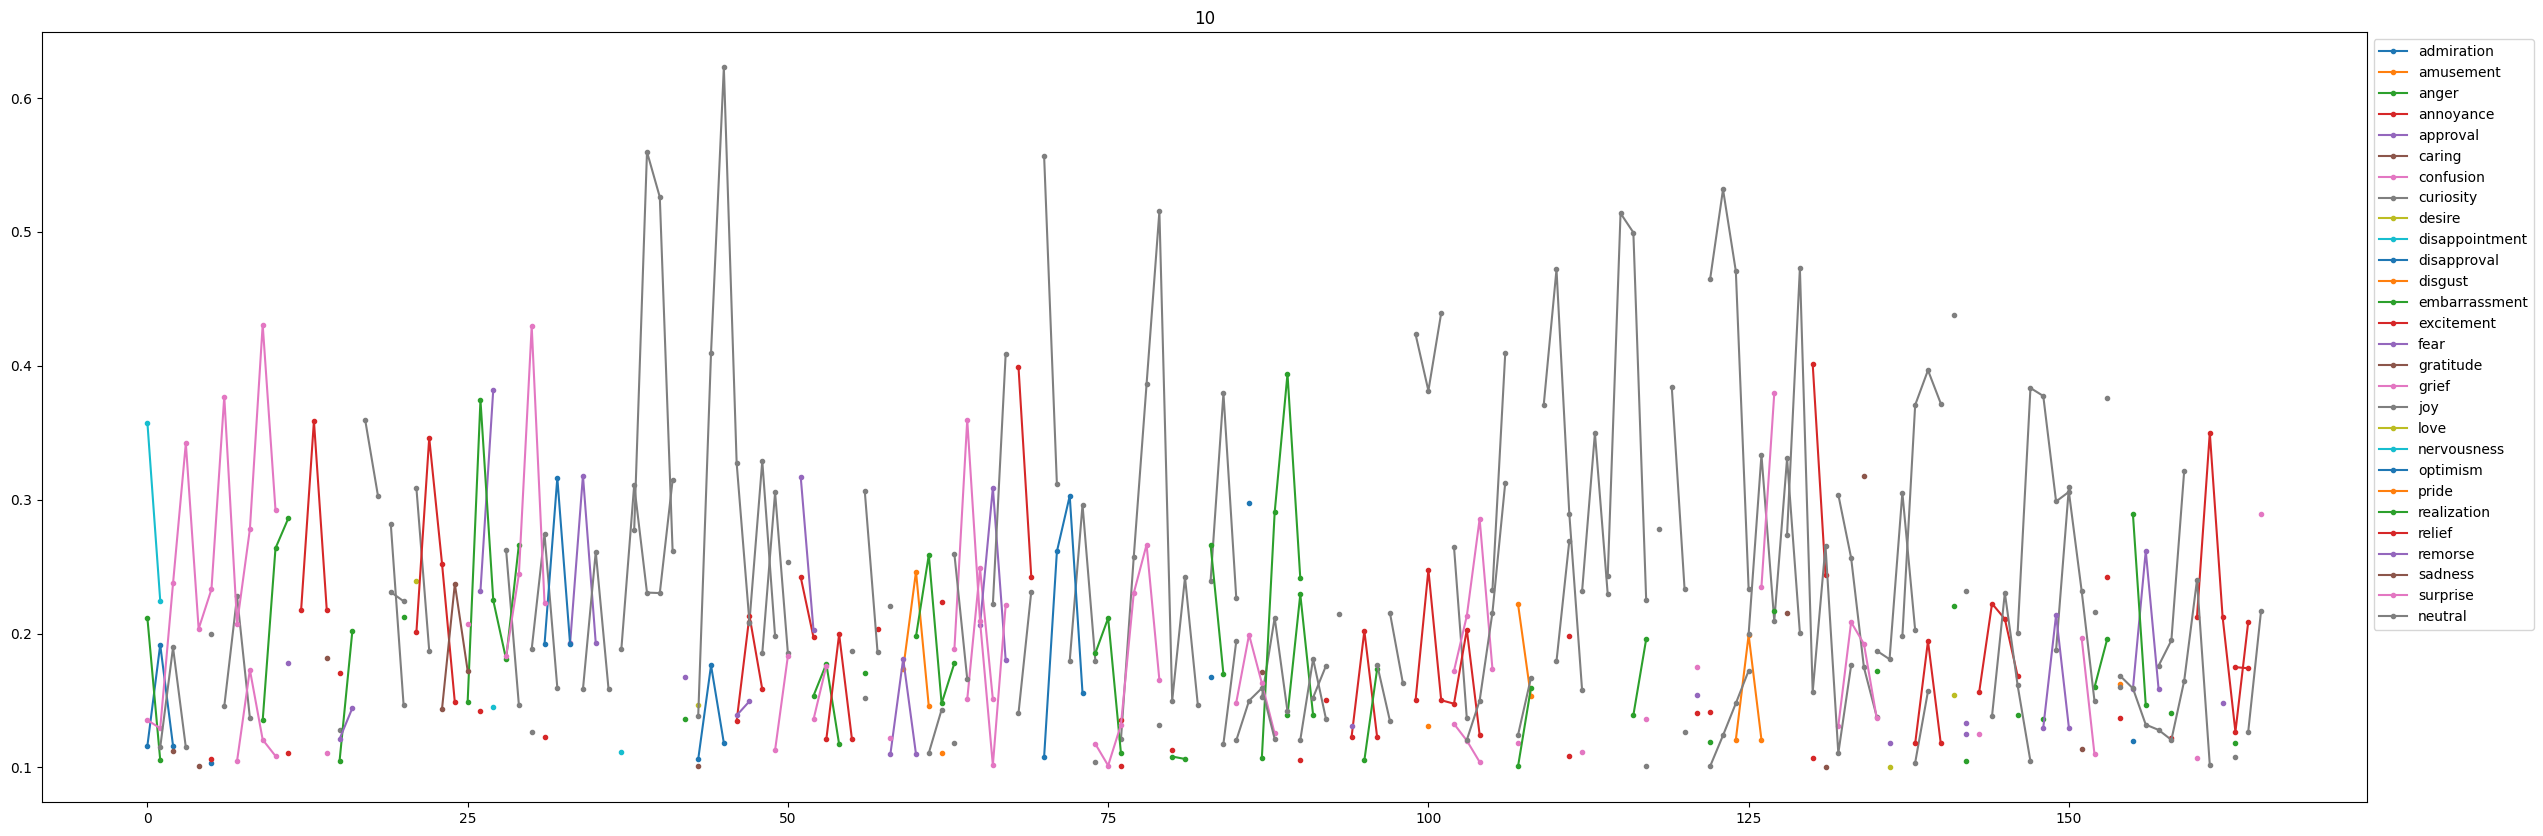

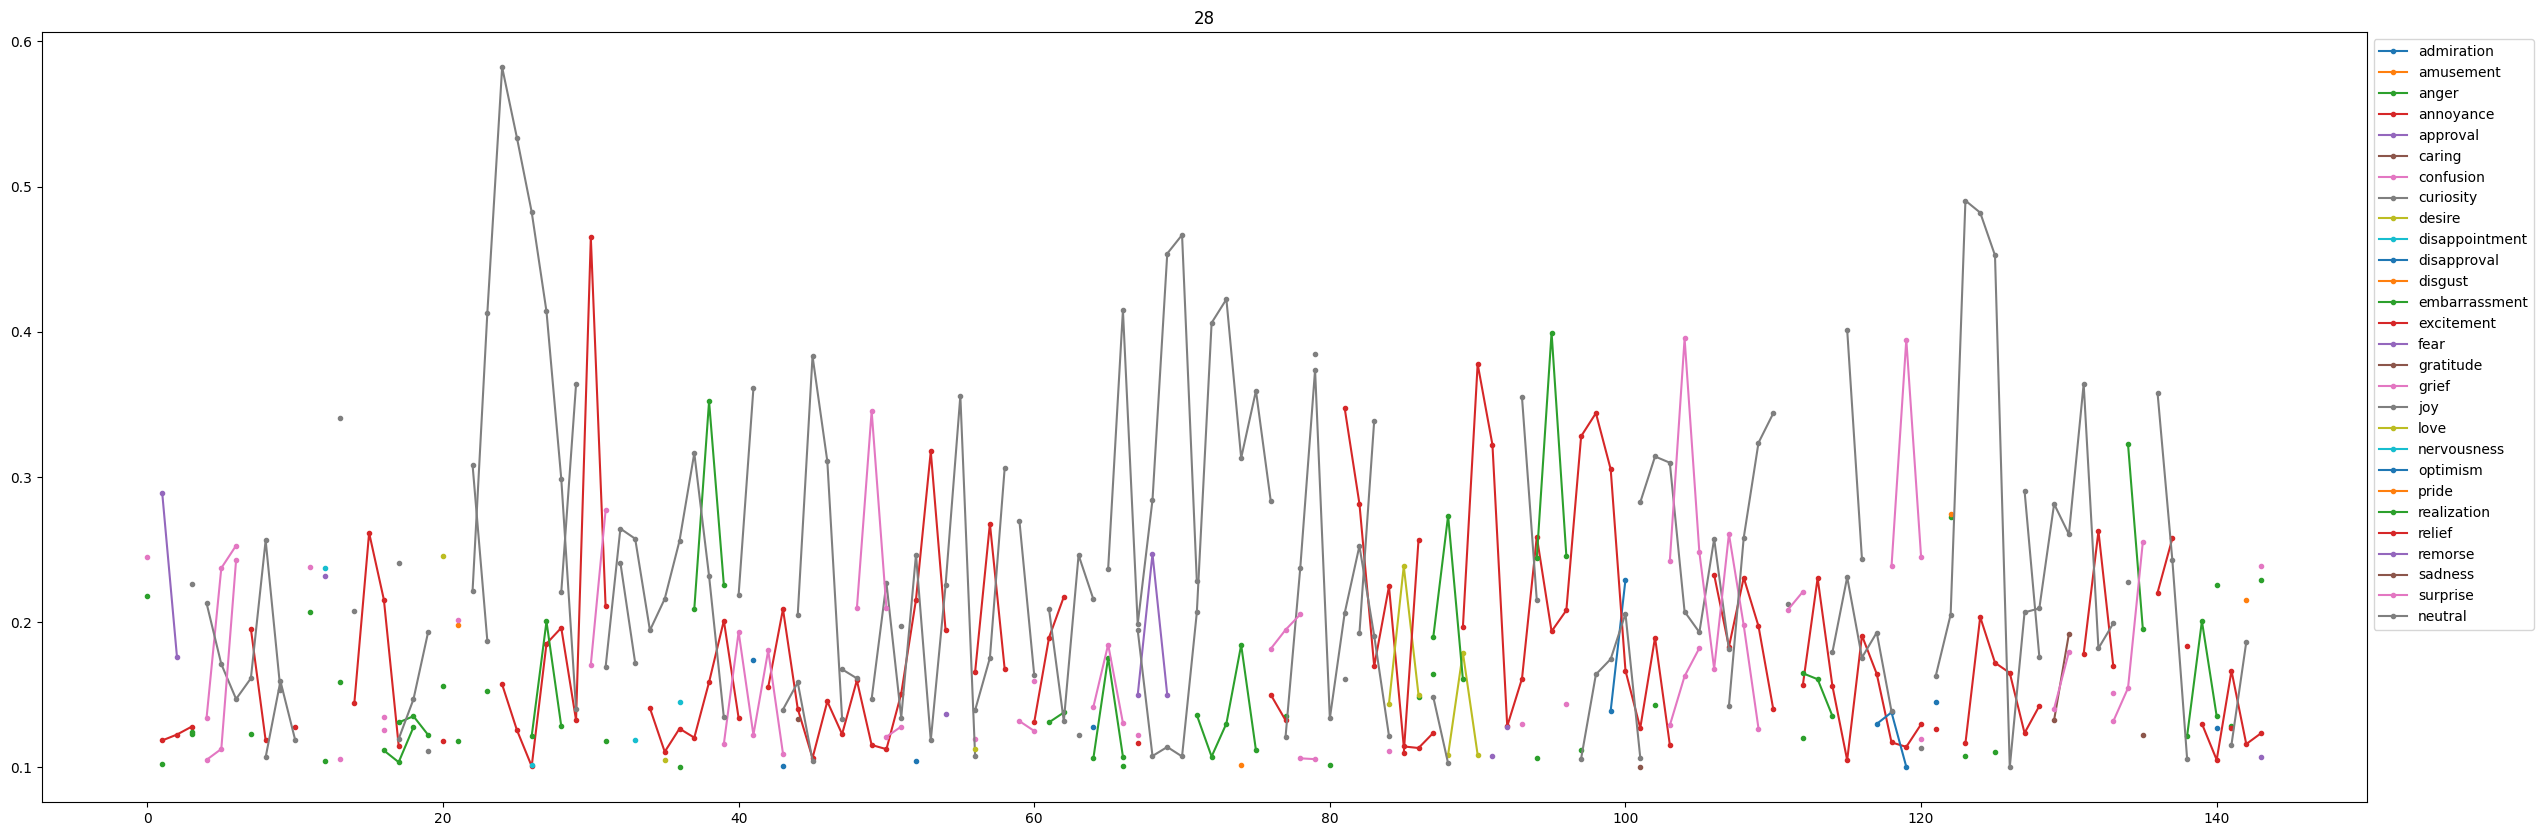

In [4]:
for id in [10, 28]:
    temp = [e for m, e in zip(music, emotions) if m == id]
    plt.figure(figsize=(30,10))
    plt.title(str(id))
    for E in EMOTION:
        l = [e[E] if E in e else np.nan for e in temp]
        #l = raw[E]
        plt.plot(l, '.-', label = E)
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()
